In [2]:
import pandas as pd

In [3]:
dataset=pd.read_csv("insurance_pre.csv")

In [4]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [5]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [6]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [7]:
independent=dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [8]:
dependent=dataset['charges']
dependent

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [49]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion='mse', splitter='best', max_features='log2')
#regressor = DecisionTreeRegressor()
regressor = regressor.fit(x_train, y_train)

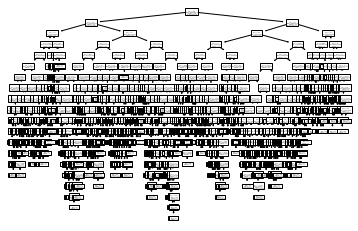

In [50]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [51]:
y_predict=regressor.predict(x_test)
y_predict

array([ 9144.565   ,  8930.93455 , 44202.6536  , 13143.86485 ,
        9264.797   , 21984.47061 ,  1615.7667  , 10381.4787  ,
        6571.544   ,  5253.524   ,  5693.4305  ,  9715.841   ,
        7345.7266  ,  4992.3764  , 18246.4955  ,  9101.798   ,
       12142.5786  ,  3292.52985 ,  6455.86265 , 17560.37975 ,
       23306.547   , 13607.36875 ,  9625.92    , 37829.7242  ,
        1826.843   ,  4673.3922  ,  4134.08245 ,  8538.28845 ,
        3161.454   ,  8968.33    ,  8252.2843  , 42211.1382  ,
       12981.3457  , 20781.48892 , 18033.9679  ,  3554.203   ,
        8733.22925 , 34806.4677  , 39836.519   ,  1880.07    ,
        4134.08245 ,  2866.091   , 17043.3414  , 49577.6624  ,
       36307.7983  ,  3579.8287  ,  9101.798   ,  6389.37785 ,
        4719.52405 , 12032.326   ,  2473.3341  ,  2801.2588  ,
       28868.6639  , 46661.4424  , 11093.6229  , 19673.33573 ,
        1826.843   ,  8782.469   ,  7726.854   , 14349.8544  ,
        1639.5631  , 46130.5265  , 14119.62    , 25333.

In [52]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_predict)
r_score

0.7050523202555656

In [53]:
import pickle
filename="finalized_model_DecisionTree.sav"
pickle.dump(regressor,open(filename,'wb'))

In [54]:
loaded_model=pickle.load(open("finalized_model_DecisionTree.sav",'rb'))
result=loaded_model.predict([[1234,345,4565,1,0]])
result

array([15555.18875])